# AI4Code: EDA

Questions:

- How many cells on average per notebook?
- What is the breakdown of markdown vs code cells.
- How many notebooks share the same ancestor_id
- What languages are in the markdown cells (If there are several languages, then select the one that prevails in the markdown cells)
    - the same as in the previous steps but with a breakdown by language
- what characters are in the markdown cells (looking for what is garbage and can be purged from the data)

## Used notebooks:
- https://www.kaggle.com/code/robikscube/google-ai4code-data-to-parquet-twitch-stream-eda
- https://www.kaggle.com/code/odins0n/ai4code-detailed-eda
- https://www.kaggle.com/code/ilyaryabov/fasttext-public-model-teaching/notebook

In [1]:
import os

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
RAW_DATA_PATH = '../../data/raw'
PROCESSING_DATA_PATH = '../../data/preprocessed/'

In [3]:
%%time
train = pd.read_parquet(os.path.join(PROCESSING_DATA_PATH, 'rob_mulla_parquet/train_all.parquet'))
train = train.astype({'cell_type': 'category', 'source': 'str'}, errors='raise') 

train.head()

CPU times: user 7.59 s, sys: 3.53 s, total: 11.1 s
Wall time: 16.1 s


,id,cell,cell_type,source,order,ancestor_id,parent_id
0,00001756c60be8,1862f0a6,code,# This Python 3 environment comes with many he...,0,945aea18,None
1,00001756c60be8,448eb224,markdown,**Импортируем необходимые для работы функции и...,1,945aea18,None
2,00001756c60be8,2a9e43d6,code,import numpy as np\nimport pandas as pd\nimpor...,2,945aea18,None
3,00001756c60be8,7e2f170a,markdown,**Подключаем предупреждения**,3,945aea18,None
4,00001756c60be8,038b763d,code,import warnings\nwarnings.filterwarnings('igno...,4,945aea18,None


## Surface analysis

### Averate cell by type per notebook

code        4204582
markdown    2166064
Name: cell_type, dtype: int64


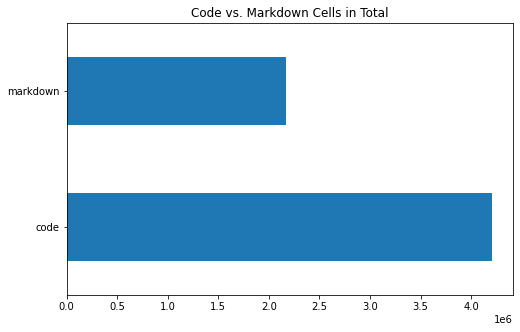

In [4]:
train["cell_type"].value_counts().plot(
    kind="barh",
    title="Code vs. Markdown Cells in Total",
    #color=my_pal[2],
    figsize=(8, 5)
)
print(train["cell_type"].value_counts())
plt.show()


The median number of cells per notebook is: 35.0


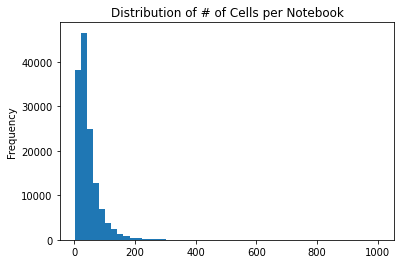

In [5]:
# Number of Cells per id
train["id"].value_counts().plot(
    kind="hist", bins=50, title="Distribution of # of Cells per Notebook"
)
print("The median number of cells per notebook is:", train["id"].value_counts().median())
plt.show()


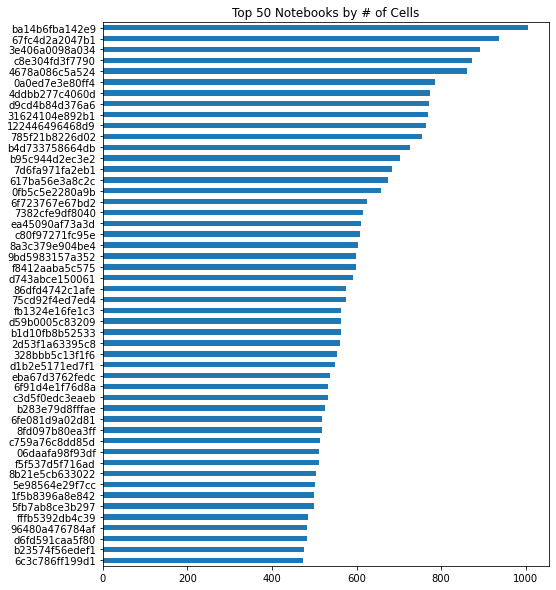

In [6]:
train["id"].value_counts().head(50).sort_values().plot(
    kind="barh", figsize=(8, 10), title="Top 50 Notebooks by # of Cells"
)
plt.show()


### What's the most forked notebook

<AxesSubplot:title={'center':'Top Forked Notebooks'}>

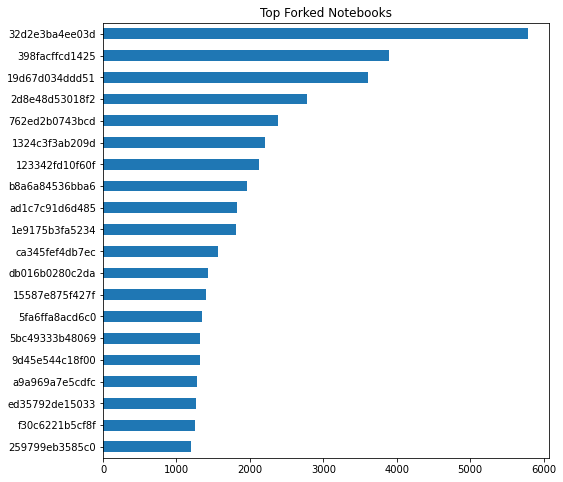

In [7]:
# Find top Id
# Find the most "parent"
train["parent_id"].value_counts().head(20).sort_values().plot(
    kind="barh", figsize=(8, 8), title="Top Forked Notebooks"
)


## Deeper analysis

### Code cells Length distribution

In [8]:
code_df = train[train.cell_type == "code"].source
code_lengths = np.array([len(df.split()) for df in code_df])
print(f'\033[94m Min Code Cells Length = ', min(code_lengths))
print(f'\033[94m Mean Code cells Length = ', round(np.mean(code_lengths),2))
print(f'\033[94m Max Code Cells Length = ', max(code_lengths))
print(f'\033[94m Median Code cells Length = ', round(np.median(code_lengths),2))
print(f'\033[94m Std Code cells Length = ', round(np.std(code_lengths),2))

 Min Code Cells Length =  1
 Mean Code cells Length =  25.24
 Max Code Cells Length =  74589
 Median Code cells Length =  10.0
 Std Code cells Length =  100.65


Text(0.5, 0, 'Lenght of Code Cells')

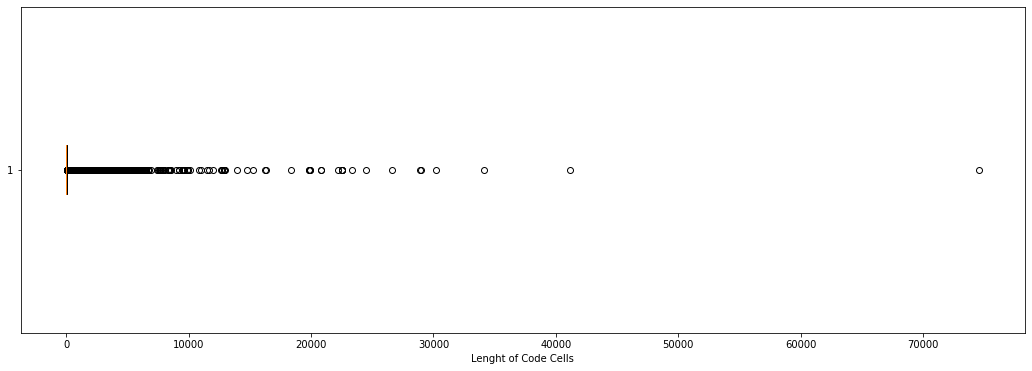

In [9]:
fig,ax= plt.subplots(figsize= (18,6))
plt.boxplot(code_lengths, vert = False)
plt.xlabel("Lenght of Code Cells")

### Markdown Cells Length Distribution

In [10]:
mkd_df = train[train.cell_type == "markdown"].source
mkd_lengths = np.array([len(df.split()) for df in mkd_df])
print(f'\033[94m Min Markdown Cells Length = ', min(mkd_lengths))
print(f'\033[94m Mean Markdown cells Length = ', round(np.mean(mkd_lengths),2))
print(f'\033[94m Max Markdown Cells Length = ', max(mkd_lengths))
print(f'\033[94m Median Code cells Length = ', round(np.median(mkd_lengths),2))
print(f'\033[94m Std Code cells Length = ', round(np.std(mkd_lengths),2))

 Min Markdown Cells Length =  1
 Mean Markdown cells Length =  29.42
 Max Markdown Cells Length =  38939
 Median Code cells Length =  11.0
 Std Code cells Length =  70.39


Text(0.5, 0, 'Lenght of Markdown Cells')

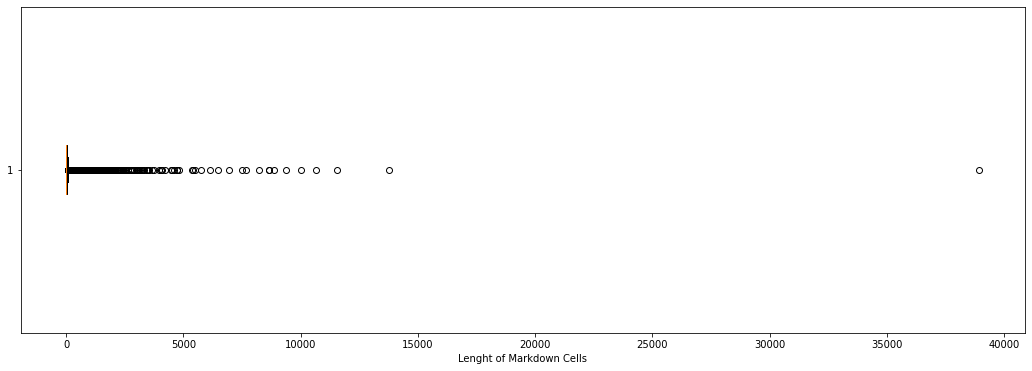

In [11]:
fig,ax= plt.subplots(figsize= (18,6))
plt.boxplot(mkd_lengths, vert = False)
plt.xlabel("Lenght of Markdown Cells")

### Notebooks cells count

In [12]:
# Calculate cells per notebook
counts_df = train[['id', 'cell', 'cell_type']].groupby(['id','cell_type']).count().reset_index()
counts_df = counts_df.groupby(['id', 'cell_type'])['cell'].aggregate('first').unstack()
counts_df.head()

cell_type,code,markdown
id,,
00001756c60be8,30,28
00015c83e2717b,72,21
0001bdd4021779,11,2
0001daf4c2c76d,178,51
0002115f48f982,8,1


In [13]:
counts_df["total"] = counts_df["code"] + counts_df["markdown"]
counts_df.describe()

cell_type,code,markdown,total
count,139256.000000,139256.000000,139256.000000
mean,30.193184,15.554547,45.747731
std,26.957452,17.223756,40.085773
min,1.000000,1.000000,2.000000
25%,14.000000,5.000000,21.000000
50%,23.000000,11.000000,35.000000
75%,38.000000,20.000000,57.000000
max,809.000000,537.000000,1005.000000


In [14]:
counts_df.median()


cell_type
code        23.0
markdown    11.0
total       35.0
dtype: float64

In [15]:
either_one = counts_df[(counts_df["markdown"] == 1) | (counts_df["code"] == 1 )] 
both_one = counts_df[(counts_df["markdown"] == 1) & (counts_df["code"] == 1 )] 
code_count_one = counts_df[counts_df["code"] == 1 ]
markdown_count_one  = counts_df[counts_df["markdown"] == 1 ]

print(f"\033[94mTotal notebook with either 1 code cell or 1 markdown cell = ", len(either_one))
print(f"\033[94mTotal notebook with both 1 code cell and 1 markdown cell = ", len(both_one ))
print(f"\033[94mNotebook counts with only 1 code cell  = " ,len(code_count_one))
print(f"\033[94mNotebook counts with only 1 markdown cell  = " ,len(markdown_count_one))

Total notebook with either 1 code cell or 1 markdown cell =  11426
Total notebook with both 1 code cell and 1 markdown cell =  392
Notebook counts with only 1 code cell  =  737
Notebook counts with only 1 markdown cell  =  11081


### Cell Language Analysis

#### Process dataframe

In [16]:
import re

In [17]:
notebooks_lang_df = pd.read_csv(os.path.join(PROCESSING_DATA_PATH, 'notebooks_lang.csv'))
notebooks_lang_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139256 entries, 0 to 139255
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   notebook_id    139256 non-null  object
 1   notebook_lang  139256 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB


In [18]:
notebooks_lang_df.iloc[1]

notebook_id                               00015c83e2717b
notebook_lang    (('__label__en',), array([0.93558216]))
Name: 1, dtype: object

In [19]:
def get_lang(row):
    row['notebook_lang'] = re.findall(r"__label__[a-z]{2}", row['notebook_lang'])[0].replace("__label__", "")
    return row

notebooks_lang = notebooks_lang_df.apply(get_lang, axis=1)
notebooks_lang

,notebook_id,notebook_lang
0,00001756c60be8,ru
1,00015c83e2717b,en
2,0001bdd4021779,en
3,0001daf4c2c76d,en
4,0002115f48f982,en
...,...,...
139251,fffc30d5a0bc46,en
139252,fffc3b44869198,en
139253,fffc63ff750064,en
139254,fffcd063cda949,en


In [20]:
notebooks_lang['notebook_lang'].value_counts()

en    128837
pt      1620
ko      1359
ja      1251
ru      1218
       ...  
sq         1
ky         1
af         1
mk         1
ia         1
Name: notebook_lang, Length: 73, dtype: int64

In [21]:
notebooks_lang[notebooks_lang.notebook_lang == "ky"]

,notebook_id,notebook_lang
103250,bdb959d13c0218,ky


In [22]:
train[train.id == "bdb959d13c0218"].source

4728338    # **Кыргыз тилинде коронавирустун тарашы боюнч...
4728339    import IPython\nurl = "https://flo.uri.sh/visu...
4728340    import numpy as np\nimport pandas as pd\nimpor...
4728341    cleaned_data = pd.read_csv('covid_19_data.csv'...
4728342    \nfig = px.line(grouped_china_date, x="Дата", ...
4728343    data['Облус'] = data['Облус'].fillna('')\ntemp...
4728344    cis = list(['Armenia','Azerbaijan','Belarus','...
4728345    fig = px.bar(latest_grouped.sort_values('Ооруг...
4728346    fig = px.bar(cis_grouped_latest.sort_values('О...
4728347    fig = px.line(grouped, x="Дата", y="Көз_жумган...
4728348    fig = px.bar(latest_grouped.sort_values('Көз_ж...
4728349    fig = px.bar(cis_grouped_latest.sort_values('К...
4728350    fig = px.bar(latest_grouped.sort_values('Айыкк...
4728351    fig = px.bar(cis_grouped_latest.sort_values('А...
4728352    temp = cleaned_data.groupby('Дата')['Айыкканда...
4728353    cleaned_latest = cleaned_data[cleaned_data['Да...
4728354    flg['Айыкканд

### Markdown cell analise

In [35]:
counts_df.sort_values(['markdown'], ascending=False)

Index(['ba14b6fba142e9', '122446496468d9', '4ddbb277c4060d', '6f723767e67bd2',
       '4678a086c5a524', '7382cfe9df8040', '6c3c786ff199d1', '8a3c379e904be4',
       'd743abce150061', '6fe081d9a02d81',
       ...
       '539c3581c2869e', '34166d2af4ed3e', '187117b6673c50', '4511b508c0233a',
       '8e11deecb59e92', '34140c801d6226', 'd0872959291a95', '53965e9aac76ec',
       '3412acea5e5285', '45ae9980379518'],
      dtype='object', name='id', length=139256)

In [38]:
TOP_N = 30

def save_markdowns(notebook_id):
    max_markdown_cells_df = train[train.id == notebook_id]
    max_markdown_cells_df = max_markdown_cells_df[train.cell_type == 'markdown']
    max_markdown_cells_df.source.to_csv(os.path.join(PROCESSING_DATA_PATH, 'markdowns', notebook_id + '.csv'), index=False)

for id in tqdm(counts_df.sort_values(['markdown'], ascending=False).index[:TOP_N]):
    save_markdowns(id)
#max_markdown_cells_df = train[train.id == counts_df.markdown.idxmax()]
#max_markdown_cells_df = max_markdown_cells_df[train.cell_type == 'markdown'].sort_values(['markdown'])
#max_markdown_cells_df

  0%|          | 0/30 [00:00<?, ?it/s]/tmp/ipykernel_55555/959808197.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  max_markdown_cells_df = max_markdown_cells_df[train.cell_type == 'markdown']
100%|██████████| 30/30 [00:08<00:00,  3.49it/s]


In [27]:
#max_markdown_cells_df.source.to_csv(os.path.join(PROCESSING_DATA_PATH, 'md_temp.csv'), index=False)